## Get Hands-On: Practical Python Data Analysis Bootcamp
## MySkill Bootcamp Data Analysis
by: Arif Rahman Naufal


In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

In [183]:
plt.style.available
plt.style.use('seaborn-v0_8')

# Dataset

This dataset is a **simulated e-commerce dataset** used in the data analysis bootcamp. The dataset includes information on products, customers, orders, and payments.

|variable       |class     |description |
|:--------------|:---------|:-----------|
**order_detail:**		
id	|object|	Unique order ID
customer_id	|object|	Unique customer ID
order_date	|object|	Transaction date
sku_id	|object|	Unique product ID
price	|int64|	Product price
qty_ordered	|int64|	Quantity of product ordered
before_discount	|float64|	Total product price (price * qty_ordered)
discount_amount	|float64|	Total product discount
after_discount	|float64|	Total product price after discount
is_gross	|int64|	Order status: unpaid
is_valid	|int64|	Order status: paid
is_net	|int64|	Order status: completed
payment_id	|int64|	Unique payment method ID
||		
**sku_detail:**		
id	|object|	Unique product identifier
sku_name	|object|	Product name
base_price	|float64|	Item price
cogs	|int64|	Cost of goods sold
category	|object|	Product category
||		
**customer_detail:**		
id	|object|	Unique customer identifier
registered_date	|object|	Registration date
||		
**payment_detail:**		
id	|int64|	Unique payment method identifier
payment_method	|object|	Payment method used

# **Dataset Source**

In [184]:
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [185]:
# displays the first 5 rows of od-dataframe
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [186]:
# displays the first 5 rows of pd-dataframe
df_pd.head()

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [187]:
# displays the first 5 rows of cd-dataframe
df_cd.head()

,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23
3,C177843L,2021-07-12
4,C951682L,2021-07-27


In [188]:
# displays the first 5 rows of sd-dataframe
df_sd.head()

,id,sku_name,base_price,cogs,category
0,P798444,AT-FSM-35,57631.70,46052,Kids & Baby
1,P938347,AYS_Haier-18HNF,3931789.26,3499256,Appliances
2,P826364,Atalian _DV206A-Brown-41,324597.00,243426,Men Fashion
3,P467533,Darul_Sakoon_Food_Bundle,2870.42,2378,Superstore
4,P229955,HP_15AY-15-Ay072NIA-ci3,2265625.00,1631250,Computing


In [189]:
# Run SQL in Python
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [190]:
# Query SQL to join Tables
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [191]:
# displays the first 5 rows of join tables from sql
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [192]:
# Summarizes the data types of each column
df.dtypes

id                  object
customer_id         object
order_date          object
sku_id              object
price                int64
qty_ordered          int64
before_discount    float64
discount_amount    float64
after_discount     float64
is_gross             int64
is_valid             int64
is_net               int64
payment_id           int64
payment_method      object
sku_name            object
base_price         float64
cogs                 int64
category            object
registered_date     object
dtype: object

In [193]:
# Converts the specified columns ("before_discount", "discount_amount", "after_discount", and "base_price") 
# to the integer data type
df = df.astype({
    "before_discount":'int', 
    "discount_amount":'int', 
    "after_discount":'int',
    "base_price":'int'})
df.dtypes

id                 object
customer_id        object
order_date         object
sku_id             object
price               int64
qty_ordered         int64
before_discount     int32
discount_amount     int32
after_discount      int32
is_gross            int64
is_valid            int64
is_net              int64
payment_id          int64
payment_method     object
sku_name           object
base_price          int32
cogs                int64
category           object
registered_date    object
dtype: object

In [194]:
# Converts (order_date and registered_date) to datetime format 
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes

id                         object
customer_id                object
order_date         datetime64[ns]
sku_id                     object
price                       int64
qty_ordered                 int64
before_discount             int32
discount_amount             int32
after_discount              int32
is_gross                    int64
is_valid                    int64
is_net                      int64
payment_id                  int64
payment_method             object
sku_name                   object
base_price                  int32
cogs                        int64
category                   object
registered_date    datetime64[ns]
dtype: object

## Question 1

The company will give prizes to customers who win the Year-End Festival competition. The Marketing Team needs help determining the estimated prizes to be given to the winners. The prizes will be the top 5 selling products in the Mobiles & Tablets category during 2022, based on sales quantity (valid = 1).

## Response to Q1


In [195]:
# Create new column 'year'
df['year'] = df['order_date'].dt.year


# Create filters 
valid = df['is_valid'] == 1
_2021 = df['year'] == 2021
_2022 = df['year'] == 2022
cat_mt = df['category'] == 'Mobiles & Tablets'

df_reward = df[valid & _2022 & cat_mt]\
            .groupby('sku_name')['qty_ordered'].sum()\
            .sort_values(ascending=False)\
            .reset_index().head()
df_reward

,sku_name,qty_ordered
0,IDROID_BALRX7-Gold,1000
1,IDROID_BALRX7-Jet black,31
2,Infinix Hot 4-Gold,15
3,samsung_Grand Prime Plus-Black,11
4,infinix_Zero 4-Grey,10


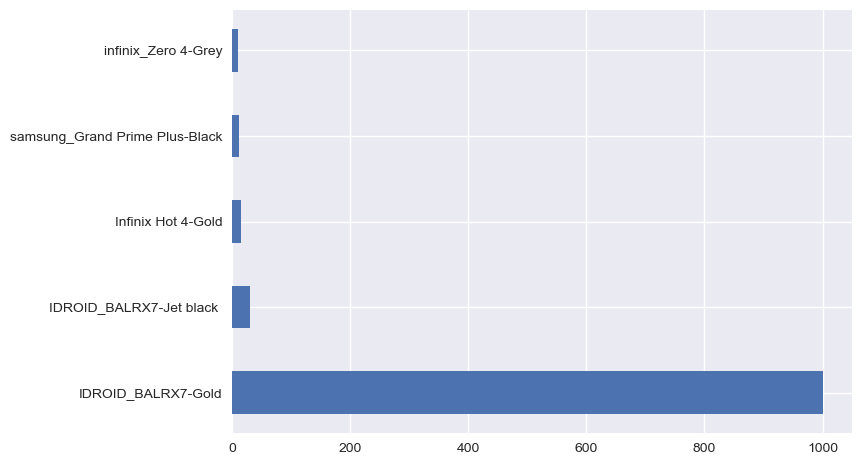

In [196]:
plt.barh(df_reward['sku_name'], df_reward['qty_ordered'], height = 0.5)
plt.show()

## Question 2

Following the joint meeting of the Warehouse and Marketing Teams, we found that the stock availability of products in the Others Category at the end of 2022 was still high.

1. We request your assistance in checking the sales data for this category with 2021 in terms of sales quantity. Our preliminary assumption is that there has been a decrease in sales quantity in 2022 compared to 2021. (Please also display the data for the top 15 categories.)

2. If there is indeed a decrease in sales quantity in the Others category, we request your assistance in providing data on the TOP 20 product names that experienced the highest decrease in 2022 compared to 2021. We will use this information as a discussion material in the next meeting.

## Response to Q2.1

In [197]:
# Find total qty_ordered per category for 2021
qo_21 = df[valid & _2021]\
        .groupby('category')['qty_ordered'].sum()\
        .reset_index(name = 'quantity_2021')

# Find total qty_ordered per category for 2022
qo_22 = df[valid & _2022]\
        .groupby('category')['qty_ordered'].sum()\
        .reset_index(name= 'quantity_2022')

# Merge tables
qo_merged = qo_21.merge(qo_22, on = 'category', how = 'outer')

# Add a 'growth' column
qo_merged['growth'] = qo_merged['quantity_2022'] - qo_merged['quantity_2021']

qo_merged = qo_merged.sort_values('growth').reset_index(drop=True)
qo_merged

,category,quantity_2021,quantity_2022,growth
0,Others,426,263,-163
1,Soghaat,759,612,-147
2,Men Fashion,237,175,-62
3,Beauty & Grooming,168,153,-15
4,Appliances,124,148,24
5,Books,171,195,24
6,Health & Sports,173,200,27
7,Computing,109,153,44
8,School & Education,184,237,53
9,Home & Living,193,250,57


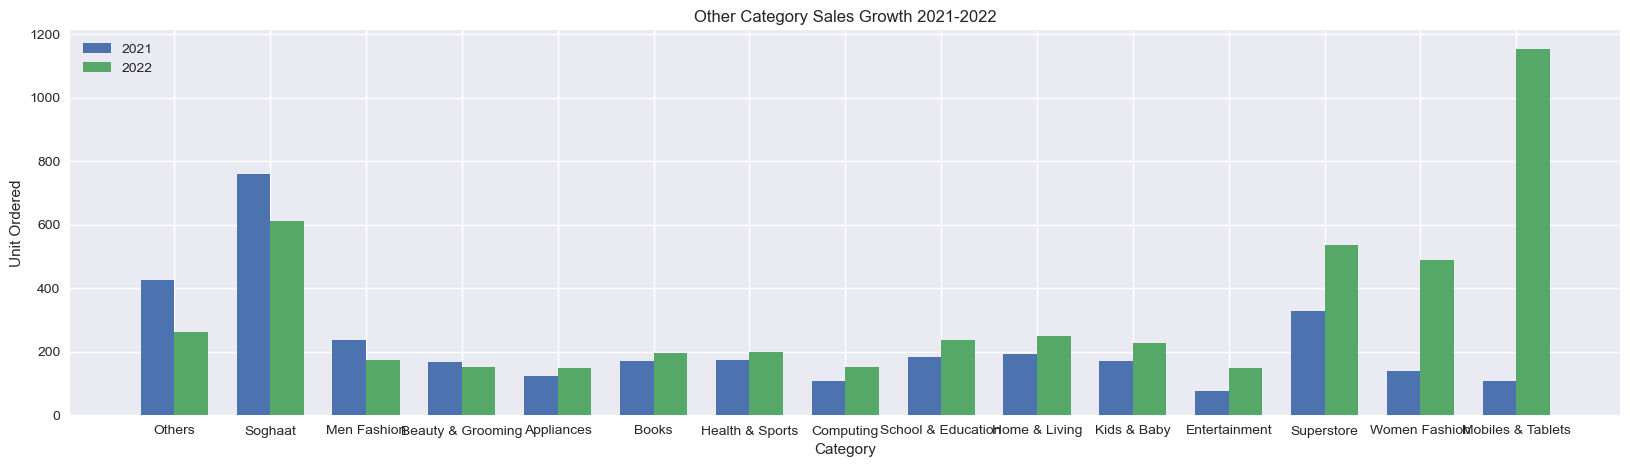

In [198]:
plt.figure(figsize=(20,5))
plt.bar(qo_merged['category'], qo_merged['quantity_2021'], width = -0.35, align='edge')
plt.bar(qo_merged['category'], qo_merged['quantity_2022'], width = 0.35, align='edge')
plt.legend(labels=['2021', '2022'])
plt.title('Other Category Sales Growth 2021-2022')
plt.xlabel('Category')
plt.ylabel('Unit Ordered')

plt.show()

## Response to Q2.2

In [199]:
# Additional filter
category_ot = df['category'] == 'Others'

# Breakdown of the total quantity ordered for each SKU within the 'others' category during 2021
sku_21 = df[valid & _2021 & category_ot]\
        .groupby('sku_name')['qty_ordered'].sum()\
        .reset_index(name = 'sales_quantity_2021')

# Breakdown of the total quantity ordered for each SKU within the 'others' category during 2022
sku_22 = df[valid & _2022 & category_ot]\
        .groupby('sku_name')['qty_ordered'].sum()\
        .reset_index(name= 'sales_quantity_2022')

# Merge tables
sku_merged = sku_21.merge(sku_22, on = 'sku_name', how = 'outer')\
            .fillna(0)

# Create a new 'difference' aggregation.
sku_merged['difference'] = sku_merged['sales_quantity_2022'] - sku_merged['sales_quantity_2021']

sku_merged = sku_merged.sort_values('difference').head(20).reset_index(drop=True)
sku_merged

,sku_name,sales_quantity_2021,sales_quantity_2022,difference
0,RB_Dettol Germ Busting Kit-bf,200.0,45.0,-155.0
1,Dawlance_MD 10 + DWB 600,23.0,0.0,-23.0
2,Telemall_MM-DR-HB-L,23.0,2.0,-21.0
3,iu_Tickets General Enclosure-Islamabad,20.0,0.0,-20.0
4,RS_Rehmat-e-Shereen Mix Mithai,13.0,0.0,-13.0
5,kansai_NeverWet,10.0,1.0,-9.0
6,sindbad_Sindbad Gift Card-3,7.0,0.0,-7.0
7,emart_00-1,7.0,1.0,-6.0
8,Am-PTV_ATS-004-M,5.0,0.0,-5.0
9,Vouch 365 2016,5.0,0.0,-5.0


## Question 3

In celebration of the company's anniversary in 2 months, the Digital Marketing Team will provide promotional information to customers by the end of this month. The customer criteria we will need are those who have already checked out but have not yet made a payment (is_gross = 1) during 2022. The data we need is Customer ID and Registered Date.

## Response to Q3

In [200]:
# Additional filters
gross = df['is_gross'] == 1
nvalid = df['is_valid'] == 0
nnet = df['is_net'] == 0

df_id = df[gross & _2022 & nvalid & nnet]
df_id = df_id[['customer_id', 'registered_date']].drop_duplicates()\
        .reset_index(drop=True)
df_id

,customer_id,registered_date
0,C246762L,2022-05-08
1,C848774L,2021-11-07
2,C693415L,2022-04-12
3,C180595L,2022-04-22
4,C587425L,2022-03-22
...,...,...
815,C653797L,2022-04-03
816,C394076L,2021-10-12
817,C248585L,2022-07-10
818,C471304L,2022-05-13


## Question 4

Average daily weekend vs. weekday sales for each month.We ran a weekend campaign from Oct-Dec 2022. Please help us analyze its impact on sales (before discount) by showing:

1. Average daily weekend vs. weekday sales for each month.
2. Average daily weekend vs. weekday sales for all three months.

## Response to Q4.1

In [201]:
# Add new columns
df['day'] = df['order_date'].dt.day_name()
df['month'] = df['order_date'].dt.month
df['month_name'] = df['order_date'].dt.month_name()

# Additional filters
weekdays = (~df['day'].isin(['Saturday', 'Sunday']))
weekends =( df['day'].isin(['Saturday', 'Sunday']))
q4 = df['month'].isin([10,11,12])


# Aggregate the "before discount" price for weekend orders during Q4 2021
daily_weekends_sales = df[valid & weekends & q4 & _2022]\
                        .groupby(['order_date', 'month', 'month_name'])[['before_discount']].sum()
# Calculate the average "before discount" value for weekends during Q4 2021
daily_weekends_sales = daily_weekends_sales.groupby(['month', 'month_name'])['before_discount'].mean().round(2)\
                        .reset_index(name = 'avg_weekend_sales')

# Aggregate the "before discount" price for weekend during Q4 2022
daily_weekdays_sales = df[valid & weekdays & q4 & _2022]\
                    .groupby(['order_date', 'month', 'month_name'])[['before_discount']].sum()
# Calculate the average "before discount" value for weekends during Q4 2021
daily_weekdays_sales = daily_weekdays_sales.groupby(['month', 'month_name'])['before_discount'].mean().round(2)\
                        .reset_index(name = 'avg_weekday_sales')

# Merge tables
monthly_merged = daily_weekends_sales.merge(daily_weekdays_sales, how='outer', on='month_name')
monthly_merged = monthly_merged[['month_name', 'avg_weekend_sales', 'avg_weekday_sales']]

# Create a new 'difference' aggregation.
monthly_merged['difference'] = monthly_merged['avg_weekend_sales'] - monthly_merged['avg_weekday_sales']
monthly_merged

,month_name,avg_weekend_sales,avg_weekday_sales,difference
0,October,5708340.67,7872212.4,-2163871.73
1,November,5774045.00,6204666.0,-430621.00
2,December,4105994.00,8542530.0,-4436536.00


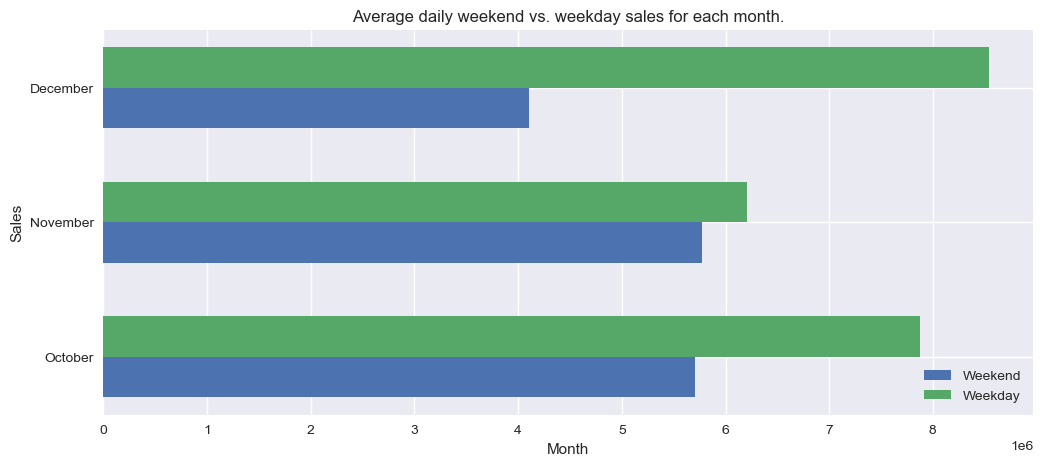

In [202]:
plt.figure(figsize=(12,5))

plt.barh(monthly_merged['month_name'], monthly_merged['avg_weekend_sales'], height = -0.3, align='edge')
plt.barh(monthly_merged['month_name'], monthly_merged['avg_weekday_sales'], height = 0.3, align='edge')
plt.legend(labels=['Weekend', 'Weekday'])
plt.title('Average daily weekend vs. weekday sales for each month.')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.show()

## Response to Q4.2

In [203]:
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,payment_method,sku_name,base_price,cogs,category,registered_date,year,day,month,month_name
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000,2610000,2610000,1,...,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100,18270,Others,2021-07-07,2021,Friday,11,November
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710,2464927,7394782,1,...,jazzwallet,PS4_Slim-500GB,1971942,1321182,Entertainment,2021-11-20,2021,Friday,11,November
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000,2065344,5416655,1,...,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000,5162580,Entertainment,2021-11-19,2021,Thursday,11,November
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680,1455440,2138239,1,...,jazzwallet,dawlance_Inverter 30,3593680,3054628,Appliances,2021-11-03,2021,Monday,11,November
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220,1059172,3354047,1,...,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220,3177472,Appliances,2021-07-05,2021,Sunday,11,November


In [204]:
q4_weekends_sales = df[valid & weekends & q4 & _2022].groupby('month_name')['before_discount'].sum().to_frame('total')
q4_weekends_sales = q4_weekends_sales['total'].mean().round()
q4_weekends_sales

12295033.0

In [205]:
q4_weekdays_sales = df[valid & weekdays & q4 & _2022].groupby('order_date')['before_discount'].sum().to_frame('total')
q4_weekdays_sales = q4_weekdays_sales['total'].mean().round()
q4_weekdays_sales

7520249.0

In [206]:
q4table = pd.DataFrame({'avg_q4_weekend': q4_weekends_sales, 
                        'avg_q4_weekdays': q4_weekdays_sales}, index=[0])
q4table

,avg_q4_weekend,avg_q4_weekdays
0,12295033.0,7520249.0


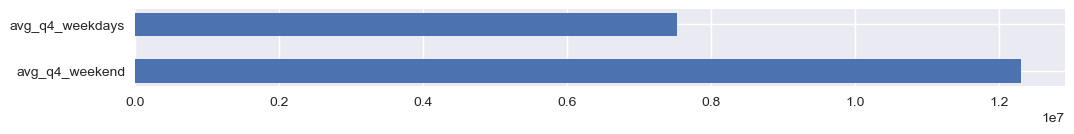

In [207]:
plt.figure(figsize=(12,1))

plt.barh(q4table.columns, q4table.iloc[0], height = 0.5)
plt.show()

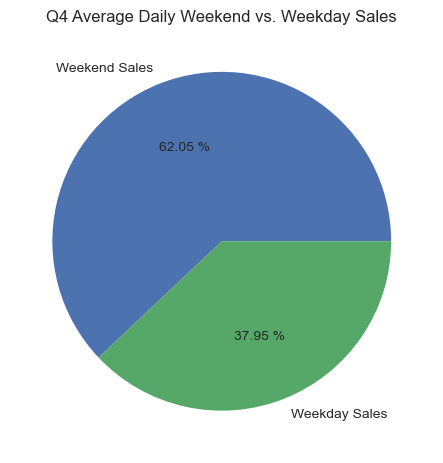

In [208]:
plt.pie([q4_weekends_sales, q4_weekdays_sales], labels=['Weekend Sales', 'Weekday Sales'], autopct='%.2f %%')
plt.title('Q4 Average Daily Weekend vs. Weekday Sales')

plt.show()